In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [3]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils

In [4]:
def display(ds, i, sampling_rate):
    x, y = ds[i]
    xin, yin = ds.data.dataset[i]
    ipd.display(ipd.Audio(xin, rate=sampling_rate))
    print(yin, y)
    plt.figure(0, figsize=(20, 20))
    plt.imshow(x.detach().numpy())
    plt.plot()
    plt.figure(2, figsize=(8, 8))
    plt.hist(x)
    plt.plot()

# YesNo

In [6]:
p = model.HParams(graphemes=datasets.YESNO_GRAPHEMES)
trainset, testset = datasets.splits(datasets.YesNo(p), p)

lor lor lor lor ken ken ken ken lor ken ken lor lor ken ken lor


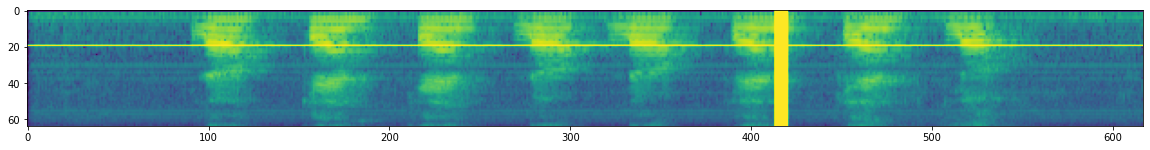

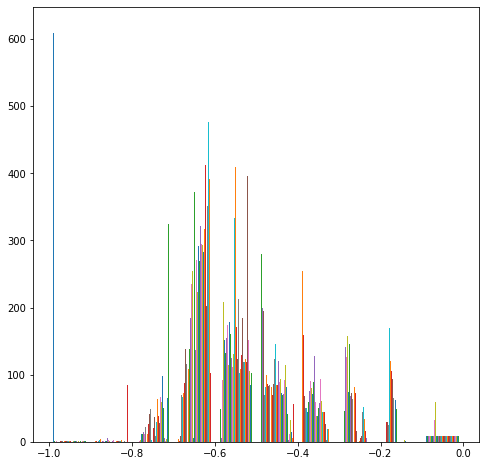

In [8]:
display(trainset, 0, p.sampling_rate)

lor lor lor lor ken ken ken ken lor lor ken lor ken lor lor ken


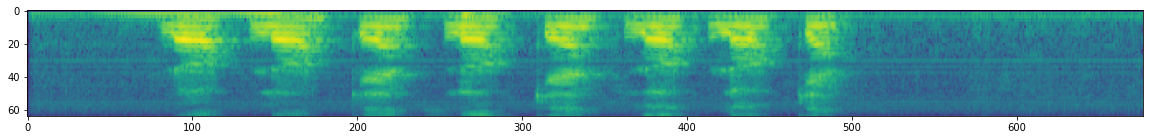

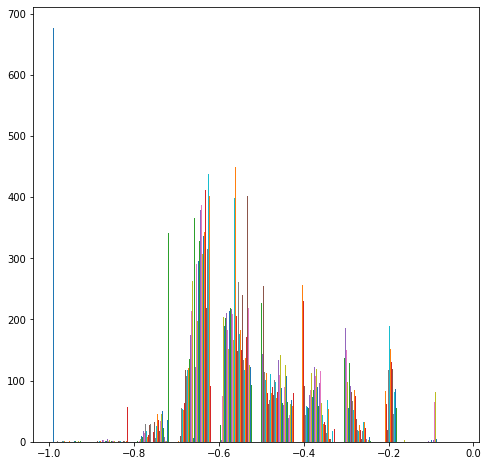

In [9]:
display(testset, 0, p.sampling_rate)

lor lor lor ken lor lor lor ken ken ken lor lor ken lor ken ken


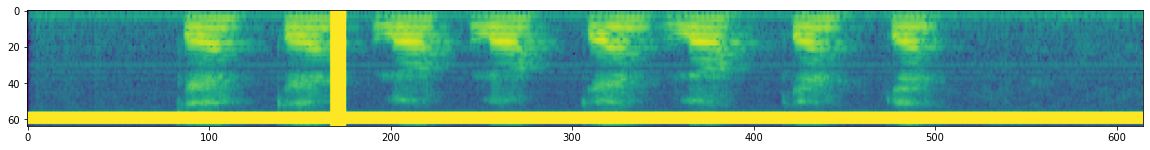

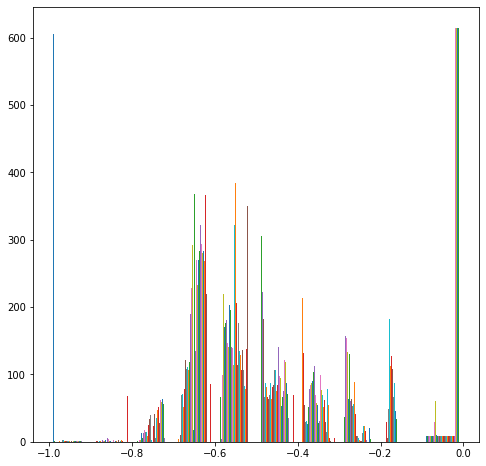

In [10]:
display(trainset, 1, p.sampling_rate)

lor lor lor ken lor lor lor ken lor lor ken ken ken ken lor lor


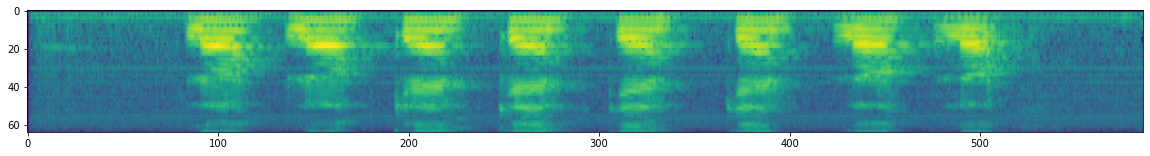

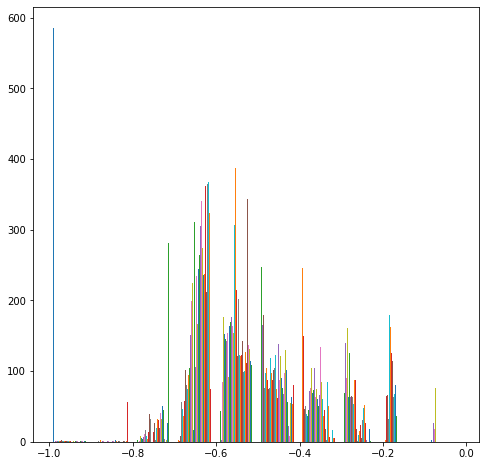

In [11]:
display(testset, 1, p.sampling_rate)

## Collation

In [12]:
batch_size = 5
batch = [trainset[i] for i in range(batch_size)]
x, nx, y, ny = datasets.batch(p)(batch)
nx_dowsampled = p.frame_lengths(nx)

In [13]:
nx, ny

(tensor([617, 615, 608, 631, 573]), tensor([31, 31, 31, 31, 31]))

In [14]:
y

tensor([[3, 5, 6, 7, 2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7,
         2, 1, 4, 7, 3, 5, 6],
        [2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 2, 1, 4],
        [3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 3, 5, 6],
        [3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7,
         2, 1, 4, 7, 2, 1, 4],
        [2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 3, 5, 6]])

In [15]:
for i in range(batch_size):
    print('want: ', trainset[i][1])
    print('gots: ', ''.join([p.graphemes[int(c)] for c in y[i]]))
    print()

want:  lor ken ken lor lor ken ken lor
gots:  lor ken ken lor lor ken ken lor

want:  ken ken lor lor ken lor ken ken
gots:  ken ken lor lor ken lor ken ken

want:  lor lor ken lor lor lor ken lor
gots:  lor lor ken lor lor lor ken lor

want:  lor lor ken lor lor ken ken ken
gots:  lor lor ken lor lor ken ken ken

want:  ken ken lor lor ken lor ken lor
gots:  ken ken lor lor ken lor ken lor



In [16]:
for i in range(batch_size):
    print('melgram: ', trainset[i][0].shape)
    print('audio: ', trainset.data.dataset[i][0].shape)
    print('batch: ', x[i].shape)
    print('nx: ', nx[i])
    print('nx_dowsampled: ', nx_dowsampled[i])
    print('ny: ', ny[i])
    print()

melgram:  torch.Size([64, 617])
audio:  torch.Size([50800])
batch:  torch.Size([64, 631])
nx:  tensor(617)
nx_dowsampled:  tensor(309)
ny:  tensor(31)

melgram:  torch.Size([64, 615])
audio:  torch.Size([54080])
batch:  torch.Size([64, 631])
nx:  tensor(615)
nx_dowsampled:  tensor(308)
ny:  tensor(31)

melgram:  torch.Size([64, 608])
audio:  torch.Size([48880])
batch:  torch.Size([64, 631])
nx:  tensor(608)
nx_dowsampled:  tensor(304)
ny:  tensor(31)

melgram:  torch.Size([64, 631])
audio:  torch.Size([48560])
batch:  torch.Size([64, 631])
nx:  tensor(631)
nx_dowsampled:  tensor(316)
ny:  tensor(31)

melgram:  torch.Size([64, 573])
audio:  torch.Size([48160])
batch:  torch.Size([64, 631])
nx:  tensor(573)
nx_dowsampled:  tensor(287)
ny:  tensor(31)



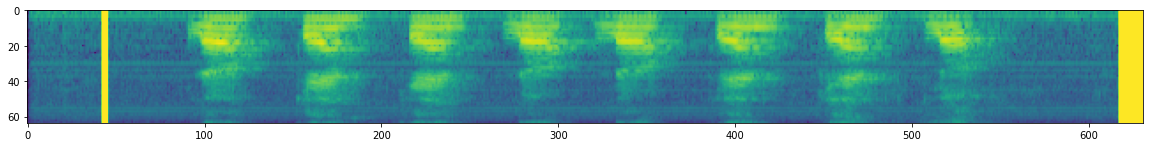

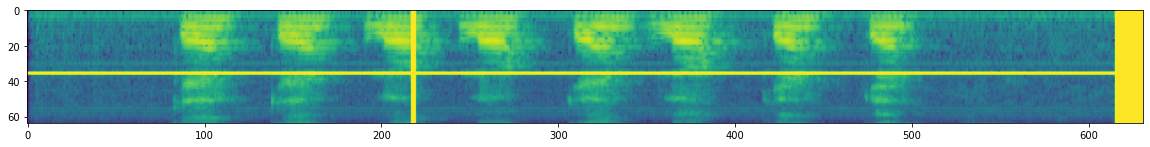

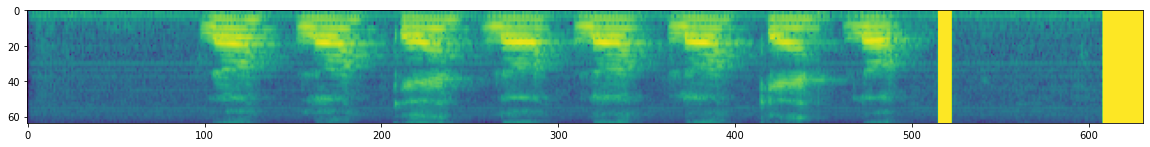

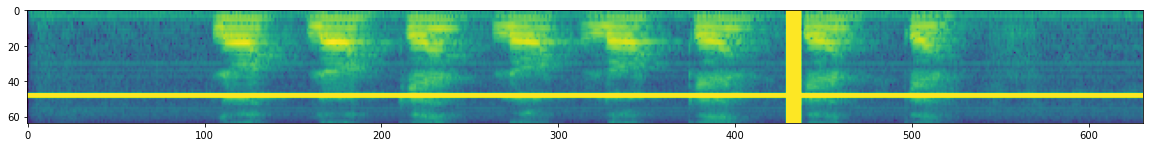

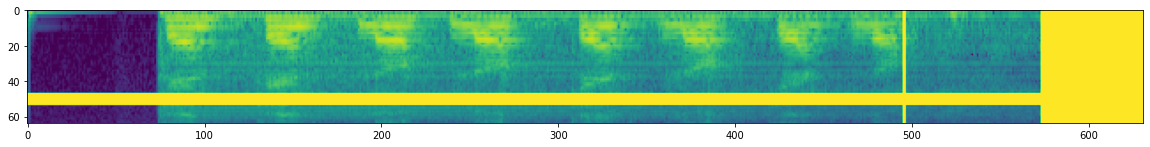

In [17]:
for i in range(batch_size):
    plt.figure(figsize=(20, 20))
    plt.imshow(x[i].detach().numpy())

## Distributions before processing

In [18]:
melspec = datasets.spec_augment(p, masked = False)[0]
yesno = datasets.YesNo(p)

In [19]:
x, y = yesno[0]
x = melspec(x)

In [20]:
def display(x):
    plt.figure(0, figsize=(20, 20))
    plt.imshow(x.detach().numpy())
    plt.plot()
    plt.figure(2, figsize=(8, 8))
    plt.hist(x)
    plt.plot();
    
def minmax(x):
    smallest, largest = x.min(), x.max()
    return (x - smallest) / (largest - smallest)

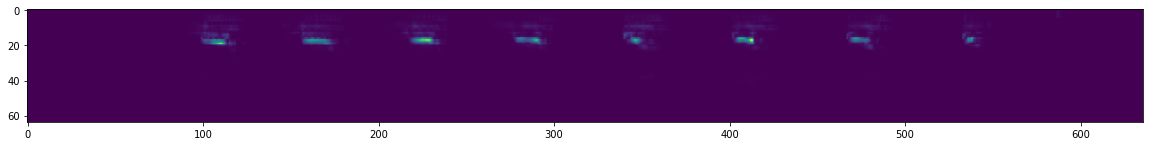

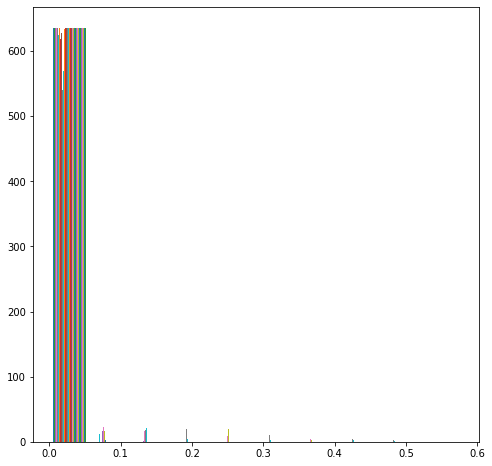

In [21]:
display(x)

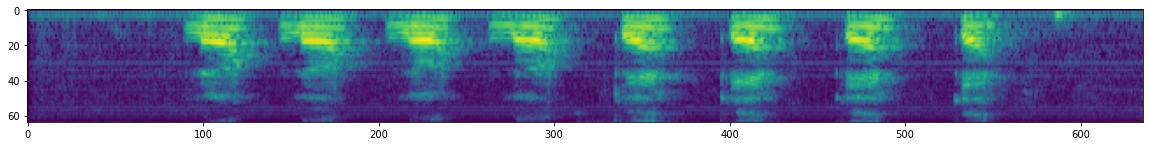

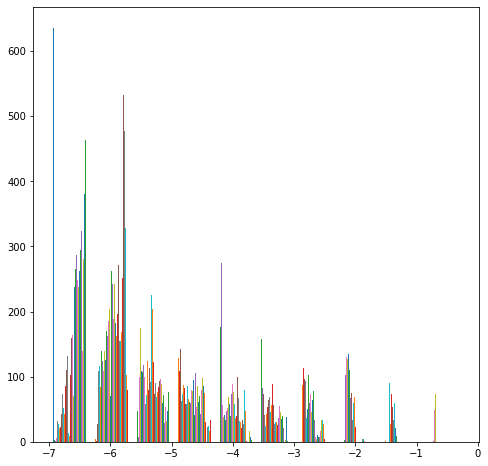

In [22]:
display((x + 1e-7).log10())

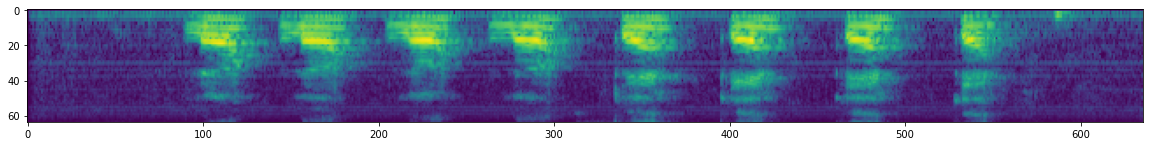

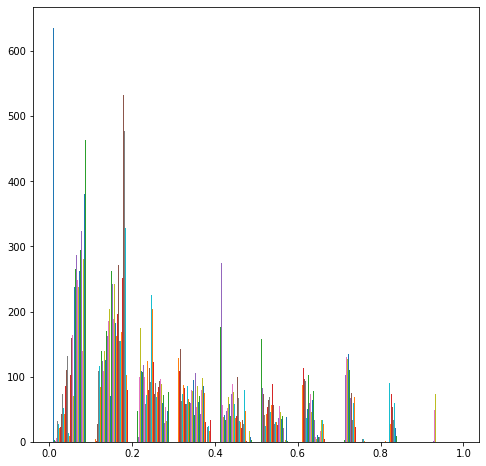

In [23]:
display(minmax((x + 1e-7).log10()))